In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('/home/healthcare_noshows.csv')
print(df.head())


      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handcap  SMS_received  Showed_up  Date.diff  
0    False         False       True          0  
1    False        

In [8]:
class_counts = df['Diabetes'].value_counts()
print(class_counts)

class_ratios = class_counts / len(df) * 100
print("Соотношение классов в процентах:\n", class_ratios)

Diabetes
False    99044
True      7943
Name: count, dtype: int64
Соотношение классов в процентах:
 Diabetes
False    92.575734
True      7.424266
Name: count, dtype: float64


In [9]:
false_diabetes = df[df['Diabetes'] == False]

# Проверяем, есть ли достаточное количество строк
if len(false_diabetes) >= 67322:
    # Удаляем первые 67322 строки, где Diabetes == False
    new_df = df.drop(false_diabetes.index[:67322])
else:
    print("Недостаточно строк с Diabetes == False для удаления.")

# Проверка результата
print(new_df['Diabetes'].value_counts())

class_counts = new_df['Diabetes'].value_counts()
print(class_counts)

class_ratios = class_counts / len(new_df) * 100
print("Соотношение классов в процентах:\n", class_ratios)

Diabetes
False    31722
True      7943
Name: count, dtype: int64
Diabetes
False    31722
True      7943
Name: count, dtype: int64
Соотношение классов в процентах:
 Diabetes
False    79.974789
True     20.025211
Name: count, dtype: float64


In [10]:
df_encoded = pd.get_dummies(df, columns=['ScheduledDay', 'AppointmentDay', 'Neighbourhood'], drop_first=True )

print(df_encoded)

           PatientId  AppointmentID Gender  Age  Scholarship  Hipertension  \
0       2.987250e+13        5642903      F   62        False          True   
1       5.589978e+14        5642503      M   56        False         False   
2       4.262962e+12        5642549      F   62        False         False   
3       8.679512e+11        5642828      F    8        False         False   
4       8.841186e+12        5642494      F   56        False          True   
...              ...            ...    ...  ...          ...           ...   
106982  2.572134e+12        5651768      F   56        False         False   
106983  3.596266e+12        5650093      F   51        False         False   
106984  1.557663e+13        5630692      F   21        False         False   
106985  9.213493e+13        5630323      F   38        False         False   
106986  3.775115e+14        5629448      F   54        False         False   

        Diabetes  Alcoholism  Handcap  SMS_received  ...  \
0  

In [11]:
label_encoder = LabelEncoder()
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])


In [12]:
print(new_df.dtypes)
print(new_df.head())


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object
       PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
4   8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   
36  7.298459e+13        5637975      F   2016-04-29     2016-04-29   63   
37  1.578132e+12        5637986      F   2016-04-29     2016-04-29   64   
41  8.224325e+14        5633339      F   2016-04-28     2016-04-29   71   
44  2.741649e+11        5635414      F   2016-04-28     2016-04-29   78   

      Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
4   JARDIM DA PENHA        False          True      True       F

In [13]:
X = df_encoded.drop(columns=['Diabetes'])  # Все столбцы, кроме целевой
y = df_encoded['Diabetes']  # Целевая переменная

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X_train, y_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X_test)
sk_nb_clf_accuracy = accuracy_score(y_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accuracy: {sk_nb_clf_accuracy}')
# print(sk_nb_clf_pred_res)

sk Naive Bayes classifier accuracy: 0.9257407234320965


In [16]:
from sklearn.metrics import precision_score

precision_score1 = precision_score(sk_nb_clf_pred_res, y_test, average='macro')
print(precision_score1)

precision_score2 = precision_score(sk_nb_clf_pred_res, y_test, average='micro')
print(precision_score2)

precision_score3 = precision_score(sk_nb_clf_pred_res, y_test, average='weighted')
print(precision_score3)


0.5
0.9257407234320965
1.0


In [17]:
from sklearn.metrics import recall_score

recall_score1 = recall_score(sk_nb_clf_pred_res, y_test, average='macro', zero_division = 1)
print(recall_score1)

recall_score2 = recall_score(sk_nb_clf_pred_res, y_test, average='micro', zero_division = 1)
print(recall_score2)

recall_score3 = recall_score(sk_nb_clf_pred_res, y_test, average='weighted', zero_division = 1)
print(recall_score3)

0.9628703617160482
0.9257407234320965
0.9257407234320965


In [18]:
specificity_score = recall_score(sk_nb_clf_pred_res, y_test, pos_label = 0)
print(specificity_score)

0.9257407234320965


In [19]:
from sklearn.metrics import f1_score

f1_score1 = f1_score(sk_nb_clf_pred_res, y_test, average='macro')
print(f1_score1)

f1_score2 = f1_score(sk_nb_clf_pred_res, y_test, average='micro')
print(f1_score2)

f1_score3 = f1_score(sk_nb_clf_pred_res, y_test, average='weighted')
print(f1_score3)

0.48071929526536755
0.9257407234320965
0.9614385905307351


In [20]:
def accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    accuracy_value = correct_predictions / len(y_true)
    return accuracy_value


In [21]:
accuracy_value = accuracy(sk_nb_clf_pred_res, y_test)
print("Accuracy:", accuracy_value)


Accuracy: 0.9257407234320965


In [22]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(sk_nb_clf, X, y, cv=5)
print(cross)

[0.92574072 0.92574072 0.92578399 0.92578399 0.92573725]


# k - Fold

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Параметры для кросс-валидации
k = 5  # Число фолдов
n_samples = len(X)
fold_size = n_samples // k  # Размер каждого фолда

# Для хранения точности на каждом фолде
accuracies = []
precisions = []
recalls = []
f1s = []

X = df_encoded.drop(columns=['Diabetes'])  # Все столбцы, кроме целевой
y = df_encoded['Diabetes']  # Целевая переменная

# Начало k-Fold валидации
for i in range(k):
    # Определяем индексы для тестового и тренировочного фолдов
    start, end = i * fold_size, (i + 1) * fold_size
    if i == k - 1:  # Последний фолд может быть меньше
        end = n_samples

    X_test, y_test = X[start:end], y[start:end]  # Тестовый фолд
    X_train = np.concatenate((X[:start], X[end:]), axis=0)  # Остальные фолды объединяются для тренировочного
    y_train = np.concatenate((y[:start], y[end:]), axis=0)

    # Инициализация и обучение модели
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Прогноз и оценка точности
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    precisions.append(precision)

    recall = recall_score(y_test, y_pred, average='weighted')
    recalls.append(recall)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1s.append(f1)

    print(f"Fold {i + 1} - Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"f1: {f1:.4f}")



# Финальная средняя точность
final_accuracy = np.mean(accuracies)
final_precision = np.mean(precisions)
final_recall = np.mean(recalls)
final_f1 = np.mean(f1s)
print(f"\nFinal average accuracy over {k} folds: {final_accuracy:.4f}")
print(f":{final_precision:.4f}")
print(f"{final_recall:.4f}")
print(f"{final_f1:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 1 - Accuracy: 0.9323
Precision: 0.9369
Recall: 0.9323
f1: 0.8997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 2 - Accuracy: 0.9308
Precision: 0.9356
Recall: 0.9308
f1: 0.8974


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 3 - Accuracy: 0.9248
Precision: 0.9304
Recall: 0.9248
f1: 0.8886


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 4 - Accuracy: 0.9170
Precision: 0.9238
Recall: 0.9170
f1: 0.8772
Fold 5 - Accuracy: 0.9240
Precision: 0.9297
Recall: 0.9240
f1: 0.8875

Final average accuracy over 5 folds: 0.9258
:0.9313
0.9258
0.8901


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(




# Stratified k-Fold


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

X = df_encoded.drop(columns=['Diabetes'])  # Все столбцы, кроме целевой
y = df_encoded['Diabetes']  # Целевая переменная

# Параметры для кросс-валидации
k = 5  # Число фолдов
n_samples = len(X)

# Получаем уникальные классы и их индексы
classes, class_counts = np.unique(y, return_counts=True)

# Разделяем индексы по классам
class_indices = [np.where(y == cls)[0] for cls in classes]

# Для хранения точности на каждом фолде
accuracies = []

# Инициализация стратифицированных фолдов
folds = [[] for _ in range(k)]

# Разделение индексов на фолды, сохраняя пропорцию классов
for cls_indices in class_indices:
    np.random.shuffle(cls_indices)

    for i in range(k):
        fold_start = i * len(cls_indices) // k
        fold_end = (i + 1) * len(cls_indices) // k
        folds[i].extend(cls_indices[fold_start:fold_end])

# k-Fold с использованием стратификации
for i in range(k):
    test_indices = np.array(folds[i])
    train_indices = np.concatenate([np.array(folds[j]) for j in range(k) if j != i])

    start, end = i * fold_size, (i + 1) * fold_size
    X_test, y_test = X[start:end], y[start:end]  # Тестовый фолд
    X_train = np.concatenate((X[:start], X[end:]), axis=0)  # Остальные фолды объединяются для тренировочного
    y_train = np.concatenate((y[:start], y[end:]), axis=0)

    # Инициализация и обучение модели
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold {i + 1} - Accuracy: {accuracy:.4f}")

# Финальная средняя точность
final_accuracy = np.mean(accuracies)
print(f"\nFinal average accuracy over {k} stratified folds: {final_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 1 - Accuracy: 0.9323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 2 - Accuracy: 0.9308


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 3 - Accuracy: 0.9248


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 4 - Accuracy: 0.9170


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Fold 5 - Accuracy: 0.9240

Final average accuracy over 5 stratified folds: 0.9258


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC


X = df_encoded.drop(columns=['Diabetes'])  # Все столбцы, кроме целевой
y = df_encoded['Diabetes']  # Целевая переменная
model = SVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_score = model.fit(X_train, y_train).decision_function(X_test)

# label_binarizer = LabelBinarizer().fit(y_train)
# y_onehot_test = label_binarizer.transform(y_test)
# class_id = np.flatnonzero(label_binarizer.classes_ == 'Diabetes')

# display = RocCurveDisplay.from_predictions(
#    y_test, y_score)
# display = RocCurveDisplay.from_predictions(
#     y_test,
#     y_score,
#     name=f"{'Diabetes'} vs the rest",
#     color="darkorange",
#     plot_chance_level=True,
# )
# _ = display.ax_.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
# )
# plt.show()


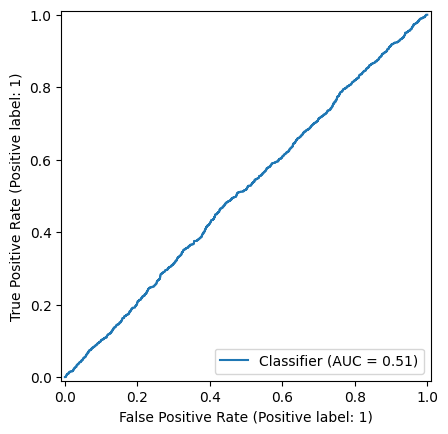

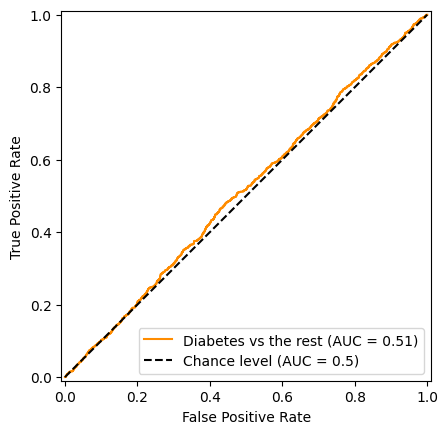

In [26]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
class_id = np.flatnonzero(label_binarizer.classes_ == 'Diabetes')

display = RocCurveDisplay.from_predictions(
   y_test, y_score)
display = RocCurveDisplay.from_predictions(
    y_test,
    y_score,
    name=f"{'Diabetes'} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)